# *Libraries*

In [155]:
import sys
import keras
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam, AdamW, SGD
from keras.regularizers import Regularizer, l1, l2
from tensorflow.keras.layers import TextVectorization, Dense, Conv2D, Flatten, Dropout, Bidirectional, LSTM
from tensorflow.keras.models import load_model, save_model, Sequential
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy

In [132]:
genderCsv = pd.read_csv('Genders.csv', usecols=[0,1])
genderCsv = genderCsv.sample(frac=0.5)
tokenizer = Tokenizer(char_level=True)

In [133]:
genderCsv

,Name,Gender
58451,Muzzammil,M
7312,Kalani,M
71174,Seslie,F
29606,Forbes,M
48891,Keonta,F
...,...,...
38070,Leaf,M
120939,Gaybreil,F
101421,Makkiyah,F
104010,Tanjanae,F


In [134]:
names = genderCsv['Name']
names = names.astype(str).values
classes = genderCsv['Gender']

In [135]:
tokenizer.fit_on_texts(names)
sequences = tokenizer.texts_to_sequences(names)

In [136]:
max_len = 20 
namesTokenized = pad_sequences(sequences, maxlen=max_len, padding='post')

In [137]:
classesEncoder = LabelEncoder()
classEncoded = classesEncoder.fit_transform(classes)

In [138]:
namesTokenized

array([[12, 15, 21, ...,  0,  0,  0],
       [14,  1,  6, ...,  0,  0,  0],
       [ 7,  2,  7, ...,  0,  0,  0],
       ...,
       [12,  1, 14, ...,  0,  0,  0],
       [10,  1,  3, ...,  0,  0,  0],
       [17,  9,  7, ...,  0,  0,  0]], dtype=int32)

In [139]:
print('Names after encoding:',namesTokenized)
print('Classes after encoding:',classEncoded)

Names after encoding: [[12 15 21 ...  0  0  0]
 [14  1  6 ...  0  0  0]
 [ 7  2  7 ...  0  0  0]
 ...
 [12  1 14 ...  0  0  0]
 [10  1  3 ...  0  0  0]
 [17  9  7 ...  0  0  0]]
Classes after encoding: [1 1 0 ... 0 0 1]


In [140]:
print('NamesShapae after encoding:',namesTokenized.shape)
print('Classes shape after encoding:',classEncoded.shape)

NamesShapae after encoding: (73634, 20)
Classes shape after encoding: (73634,)


In [142]:
xtrain, xtest, ytrain, ytest = train_test_split(namesTokenized, classEncoded, test_size=0.2, random_state=42, stratify=classEncoded)

In [143]:
# xtrain = xtrain.toarray()
# xtest = xtest.toarray()

In [201]:
model = Sequential([
    Flatten(),
    
    Dense(256,activation='relu') ,
    Dropout(0.1),
    
    Dense(128,activation='relu') ,
    Dropout(0.2),

    Dense(64,activation='relu') ,
    Dropout(0.1),

    Dense(32,activation='relu') ,
    Dense(1, activation='sigmoid')
])


In [202]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy']  )

In [203]:
history=model.fit(x=xtrain, y=ytrain,validation_data=(xtest,ytest), epochs=20)

Epoch 1/20
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6020 - loss: 0.6775 - val_accuracy: 0.6271 - val_loss: 0.6549
Epoch 2/20
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6228 - loss: 0.6507 - val_accuracy: 0.6447 - val_loss: 0.6164
Epoch 3/20
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6569 - loss: 0.6105 - val_accuracy: 0.6740 - val_loss: 0.5825
Epoch 4/20
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6744 - loss: 0.5826 - val_accuracy: 0.6832 - val_loss: 0.5667
Epoch 5/20
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6857 - loss: 0.5714 - val_accuracy: 0.6912 - val_loss: 0.5634
Epoch 6/20
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6913 - loss: 0.5630 - val_accuracy: 0.6996 - val_loss: 0.5541
Epoch 7/20
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6961 - loss: 0.5600 - val_accuracy: 0.7001 - val_loss: 0.5508
Epoch 8/20
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6988 - loss: 0.5539 - 

In [204]:
model.evaluate(xtest,ytest)

461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7126 - loss: 0.5395


[0.5335441827774048, 0.7203775644302368]

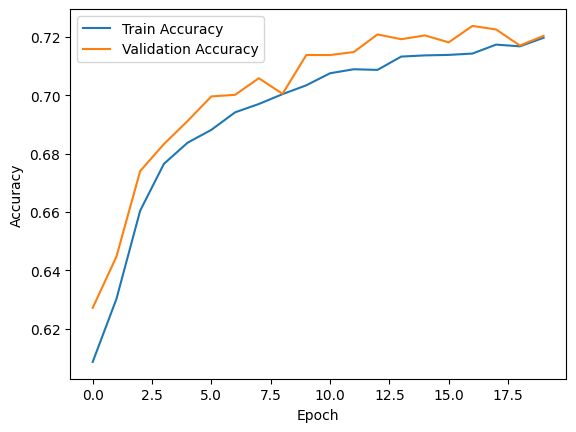

In [206]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [221]:
input_name = "carol"

input_seq = tokenizer.texts_to_sequences([input_name])
input_padded = pad_sequences(input_seq, maxlen=20)

pred_prob = model.predict(input_padded)

if pred_prob >= 0.5:
    print("Predicted Gender: Woman")
else:
    print("Predicted Gender: Man")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Gender: Woman
